<a href="https://colab.research.google.com/github/inesmurtagh/analisis-predictivo/blob/main/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#82.05 - Analisis Predictivo 
**Examen Final**

Inés Murtagh

+ Base obtenida del **Department of Transportation**
+ Tipos de predicción: clasificación
+ Variable target: satisfaction

## Importación del Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
airline-passenger-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df = pd.read_csv("train.csv", sep=",")
test = pd.read_csv("test.csv", sep=",")

## Analisis Exploratorio de Datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *  

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

**Filas y Columnas**

In [ ]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (103904, 24)


**Datos duplicados**

In [ ]:
df.duplicated().sum()

0

No hay datos duplicados en la df

In [ ]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Se supone que si el 'Arrival Delay in Minutes' es nulo, entonces es 0 (no hubo retraso)

In [ ]:
df['Arrival Delay in Minutes'] = np.where((df['Arrival Delay in Minutes'].isnull()), 0, df['Arrival Delay in Minutes'])

In [ ]:
# variable nueva: calificación obtenida a partir de los distintos scores
scores = df[['Inflight wifi service', 'Inflight entertainment', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Departure/Arrival time convenient', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]

df["Total Score"] = scores.sum(axis = 1)
total = len(scores.columns)*5

# porcentaje del total de calificaciones
df["Total Score %"] = round((df["Total Score"]/total)*100, 1)

One hot encoding:

In [ ]:
# Creamos las variables binarias
dummies = pd.get_dummies(df['Gender'])

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

In [ ]:
# Creamos las variables binarias
dummies = pd.get_dummies(df['Customer Type'])

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

In [ ]:
# Creamos las variables binarias
dummies = pd.get_dummies(df['Type of Travel'])

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

Codificación ordinal:

In [ ]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Eco Plus', 'Business', 'Eco']])

# Ajustamos el codificador con la variable class y la transformamos
encoder.fit(df[["Class"]])
df["Class-encoded"] = encoder.transform(df[["Class"]])

In [ ]:
df['Class-encoded'] = df['Class-encoded'].astype(int, errors = 'ignore')

In [ ]:
df['Class-encoded'].unique()

array([0, 1, 2])

Variable **target**:


In [ ]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
df['satisfaction'] = np.where((df['satisfaction'] == 'satisfied'), 1, 0)

## Descripción estadistica de los datos

In [ ]:
copia = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
            'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

In [ ]:
copia.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Cada variable se puntea de 1 a 5
# aquellas que tengan 0, se tomará como 1
df['Inflight wifi service'] = np.where((df['Inflight wifi service'] == 0), 1, df['Inflight wifi service'])
df['Departure/Arrival time convenient'] = np.where((df['Departure/Arrival time convenient'] == 0), 1, df['Departure/Arrival time convenient'])
df['Ease of Online booking'] = np.where((df['Ease of Online booking'] == 0), 1, df['Ease of Online booking'])
df['Food and drink'] = np.where((df['Food and drink'] == 0), 1, df['Food and drink'])
df['Online boarding'] = np.where((df['Online boarding'] == 0), 1, df['Online boarding'])
df['Inflight entertainment'] = np.where((df['Inflight entertainment'] == 0), 1, df['Inflight entertainment'])
df['On-board service'] = np.where((df['On-board service'] == 0), 1, df['On-board service'])
df['Leg room service'] = np.where((df['Leg room service'] == 0), 1, df['Leg room service'])
df['Inflight service'] = np.where((df['Inflight service'] == 0), 1, df['Inflight service'])
df['Cleanliness'] = np.where((df['Cleanliness'] == 0), 1, df['Cleanliness'])
df['Checkin service'] = np.where((df['Checkin service'] == 0), 1, df['Checkin service'])
df['Seat comfort'] = np.where((df['Seat comfort'] == 0), 1, df['Seat comfort'])
df['Gate location'] = np.where((df['Gate location'] == 0), 1, df['Gate location'])

### **Outliers**

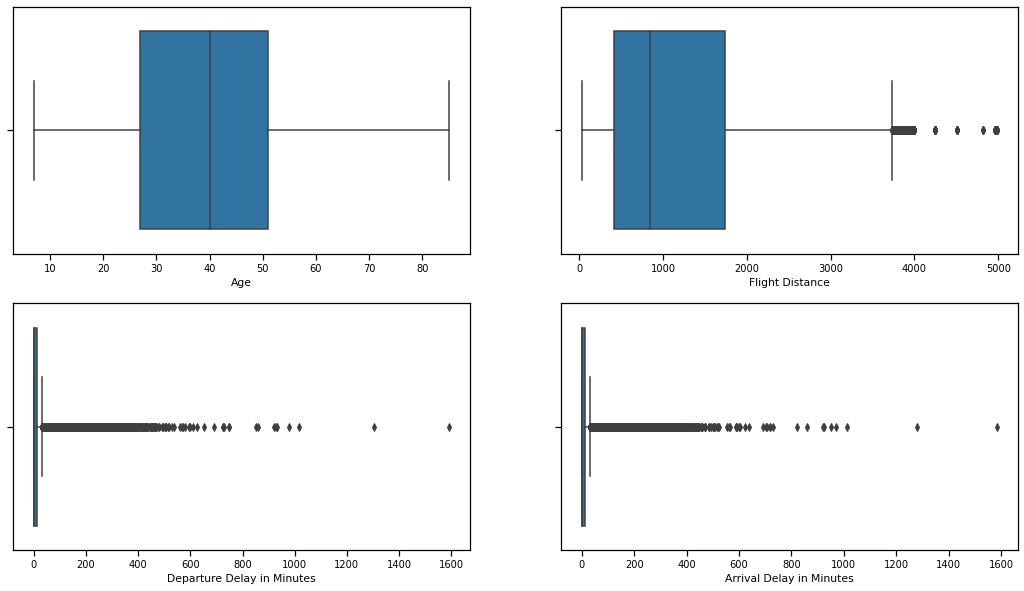

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(18, 10))

sns.boxplot(x=df["Age"],ax=axs[0,0])
sns.boxplot(x=df["Flight Distance"],ax=axs[0,1])
sns.boxplot(x=df["Departure Delay in Minutes"],ax=axs[1,0])
sns.boxplot(x=df["Arrival Delay in Minutes"],ax=axs[1,1])

plt.show()

In [ ]:
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000
mean,14.815618,15.133392
std,38.230901,38.649776
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [ ]:
df[['id', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient', 'satisfaction', 'Total Score %']][df['Departure Delay in Minutes'] > 1000]

,id,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,satisfaction,Total Score %
6744,69661,1305,1280.0,2,1,74.3
61310,4903,1017,1011.0,1,1,64.3
83741,73471,1592,1584.0,2,0,54.3


### **Correlacion**

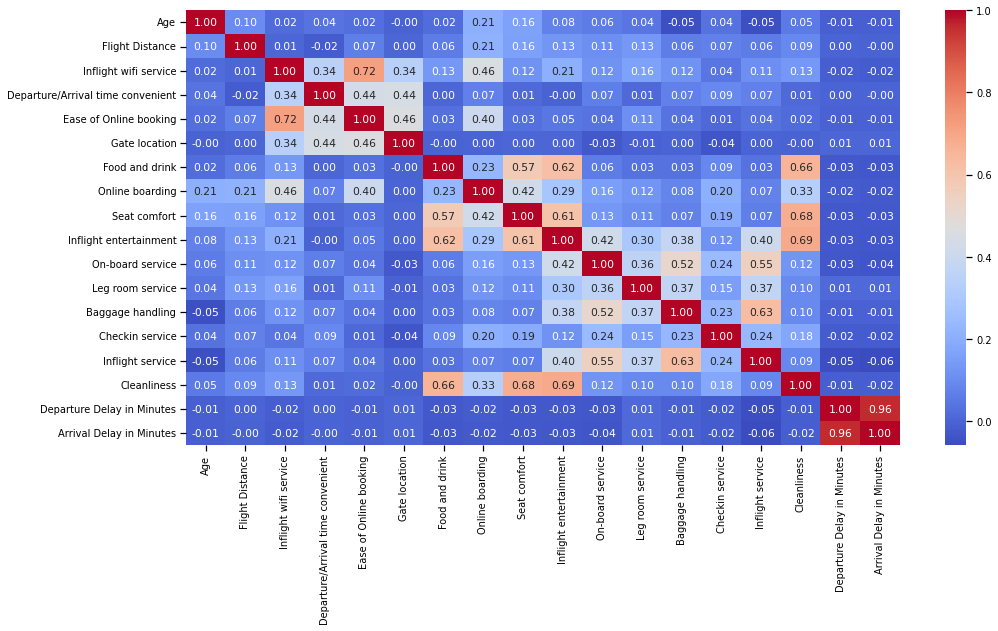

In [ ]:
sns.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax = ax, data = copia.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

A continuación se muestran las inferencias del mapa de calor anterior:

El servicio wifi a bordo y la facilidad de reserva en línea tienen una alta correlación positiva.

La función de comida y bebida tiene una correlación positiva muy alta con las funciones de entretenimiento a bordo, limpieza y comodidad del asiento.
El servicio a bordo tiene una correlación positiva menor con el servicio a bordo y el manejo de equipaje

La demora en la salida en minutos tiene una correlación muy fuerte con la demora en la llegada en minutos, lo cual es bastante obvio si hay una demora en la salida, por lo que también habría una demora en la llegada.

## Visualizaciones

Target variable Information:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


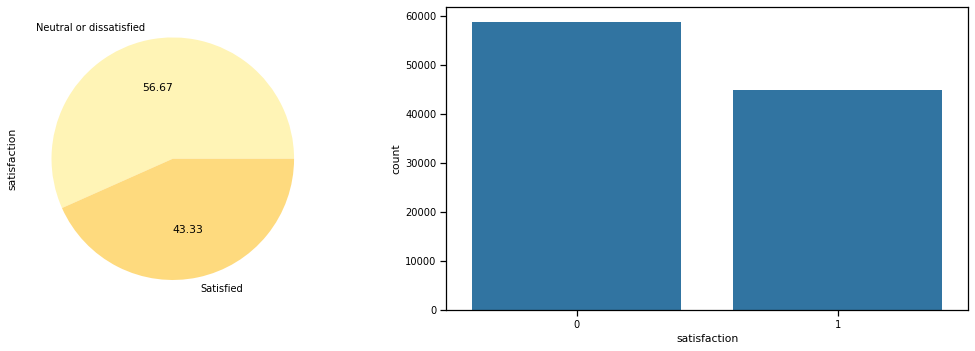

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
labels = ["Neutral or dissatisfied", "Satisfied"]
df['satisfaction'].value_counts().plot(kind ='pie', labels = labels, autopct ='%.2f',colors = sns.color_palette("YlOrBr"))

plt.subplot(1,2,2)
sns.countplot(df['satisfaction'], color = "#1e77b4")

plt.tight_layout()

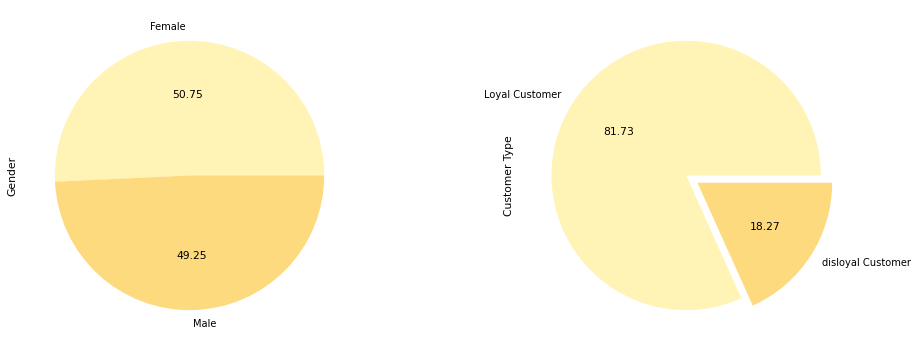

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind ='pie',autopct ='%.2f', colors = sns.color_palette("YlOrBr"))

plt.subplot(1,2,2)
df['Customer Type'].value_counts().plot(kind ='pie',autopct ='%.2f', explode= [0,0.1], colors = sns.color_palette("YlOrBr"))

plt.tight_layout()

Gender distribution:

Male: 49.25%
Female: 50.75%

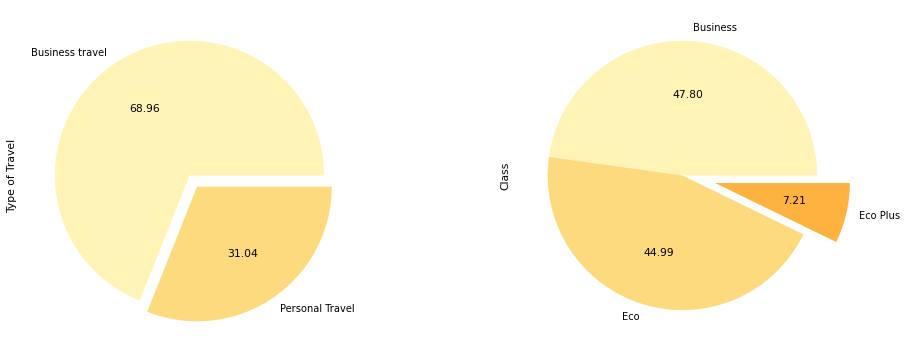

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
df['Type of Travel'].value_counts().plot(kind ='pie',autopct = '%.2f',explode = [0,0.1], colors = sns.color_palette("YlOrBr"))

plt.subplot(1, 2, 2)
df['Class'].value_counts().plot(kind ='pie',autopct ='%.2f',explode =[0,0,0.25], colors = sns.color_palette("YlOrBr"))
plt.tight_layout()

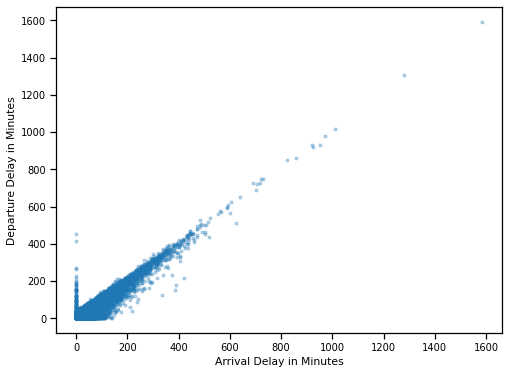

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.3, marker = '.')
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.show()

Text(0, 0.5, 'Passengers')

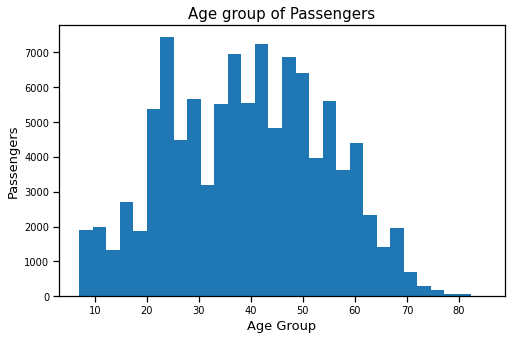

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=30)

plt.title("Age group of Passengers", size = 15)
plt.xlabel("Age Group", size = 13)
plt.ylabel("Passengers", size = 13)

Text(0, 0.5, 'Number of flights')

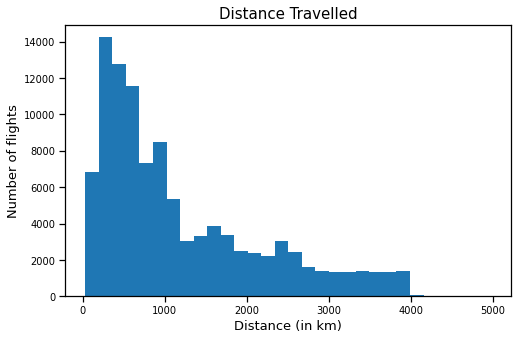

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Flight Distance'], bins=30)

plt.title("Distance Travelled", size = 15)
plt.xlabel("Distance (in km)", size = 13)
plt.ylabel("Number of flights", size = 13)

Text(0, 0.5, 'Flights')

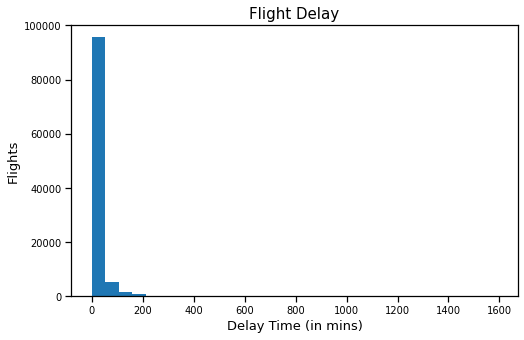

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Departure Delay in Minutes'], bins=30)

plt.title("Flight Delay", size = 15)
plt.xlabel("Delay Time (in mins)", size = 13)
plt.ylabel("Flights", size = 13)

Text(0, 0.5, 'Flights')

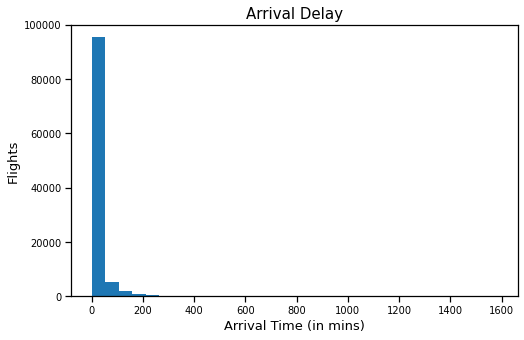

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Arrival Delay in Minutes'], bins=30, color = "#1e77b4")

plt.title("Arrival Delay", size = 15)
plt.xlabel("Arrival Time (in mins)", size = 13)
plt.ylabel("Flights", size = 13)

A partir de este diagrama de cajas, podemos concluir que la mayoría de los clientes regulares de la aerolínea tienen entre 30 y 50 años (su edad promedio es ligeramente superior a los 40). El rango de edad de los clientes no regulares es un poco más pequeño (de 25 a 40 años, en promedio, un poco menos de 30).

Se puede observar que, en promedio, el rango de edad de aquellos clientes que viajan en clase ejecutiva es el mismo (según el cuadro anterior) que el rango de edad de los clientes regulares. Con base en esta observación, se puede suponer que los clientes habituales compran principalmente la clase ejecutiva para ellos mismos.

A partir de este diagrama de caja, se puede sacar la siguiente conclusión: los clientes cuya distancia de vuelo es larga, en su mayoría vuelan en clase ejecutiva.

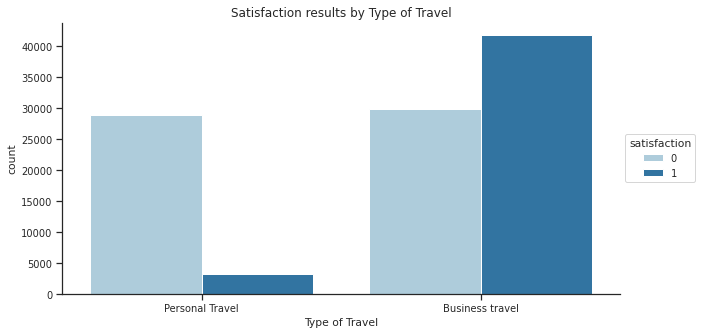

In [ ]:
# create graph
plt.figure(figsize = (10,5))
sns.countplot(x ="Type of Travel", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Type of Travel", size = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

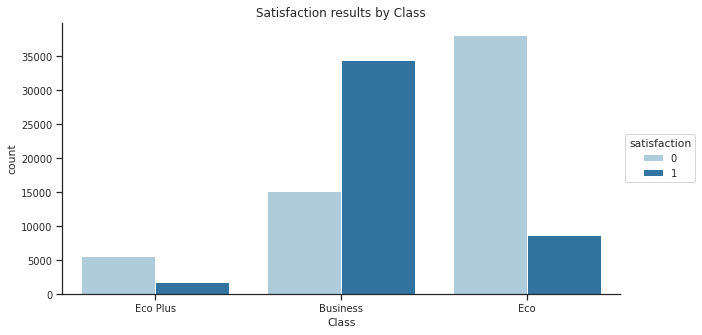

In [ ]:
# create graph
plt.figure(figsize = (10, 5))
sns.countplot(x ="Class", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Class", size = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

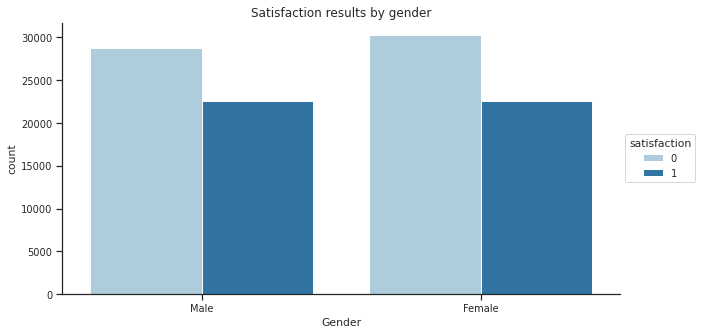

In [ ]:
# create graph
plt.figure(figsize = (10, 5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by gender", size = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

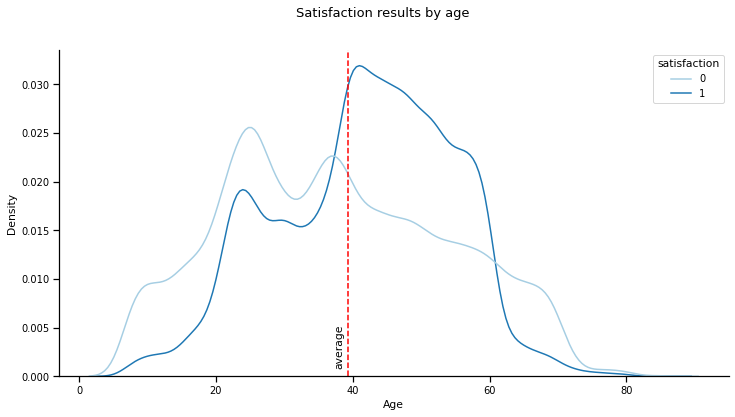

In [ ]:
# create graph
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df, x= "Age", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by age", fontsize = 13)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.axvline(df["Age"].mean(),ls = "--", color = "red")
plt.text(df["Age"].mean()-2,0.001,'average', rotation=90)
plt.show()

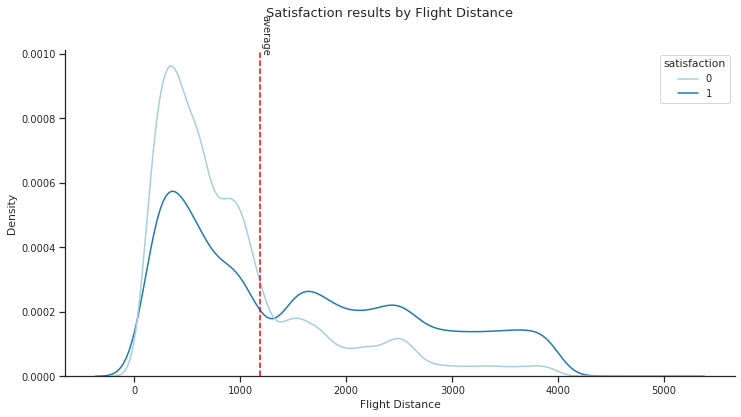

In [ ]:
# create graph
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df, x= "Flight Distance", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by Flight Distance", fontsize = 13)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.axvline(df["Flight Distance"].mean(),ls = "--", color = "red")
plt.text(df["Flight Distance"].mean()-2, 0.001,'average', rotation=90)
plt.show()

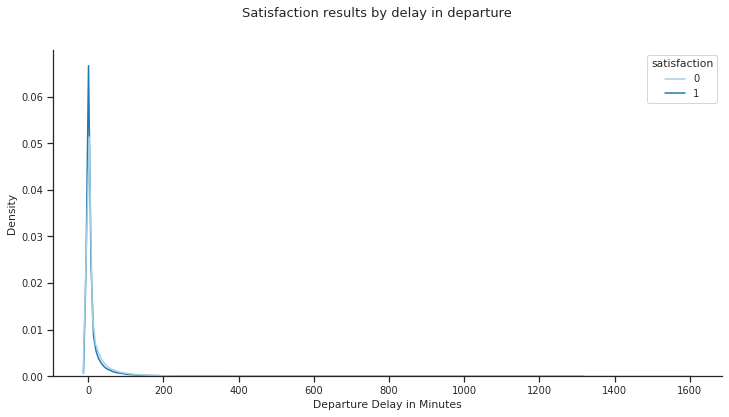

In [ ]:
# create graph
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df, x= "Departure Delay in Minutes", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by delay in departure", fontsize = 13)
sns.despine(top = True, right = True, left = False, bottom = False)

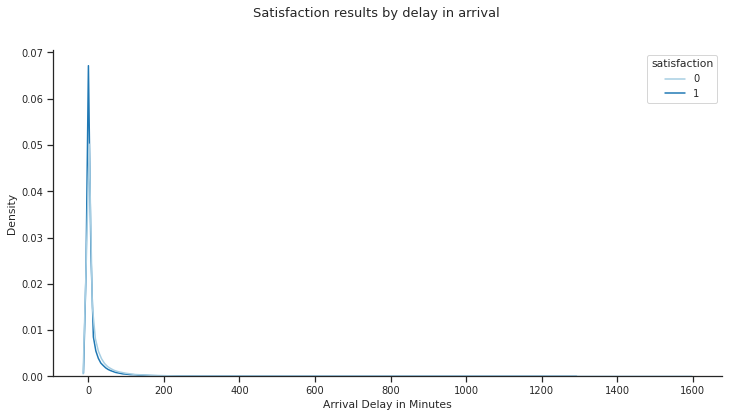

In [ ]:
# create graph
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df, x= "Arrival Delay in Minutes", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by delay in arrival", fontsize = 13)
sns.despine(top = True, right = True, left = False, bottom = False)

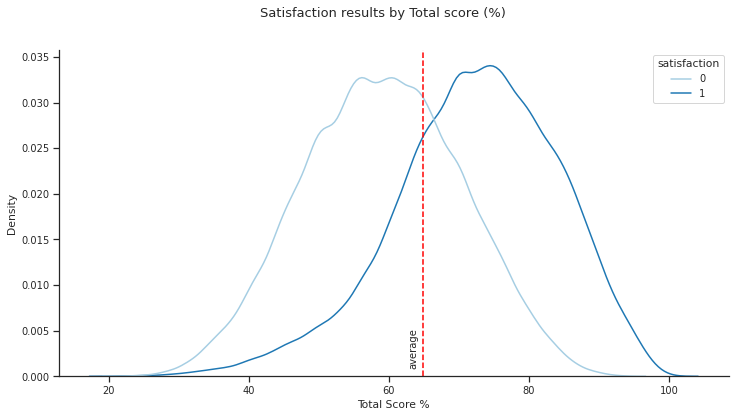

In [ ]:
# create graph
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df, x= "Total Score %", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by Total score (%)", fontsize = 13)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.axvline(df["Total Score %"].mean(),ls = "--", color = "red")
plt.text(df["Total Score %"].mean()-2, 0.001, 'average', rotation=90)
plt.show()

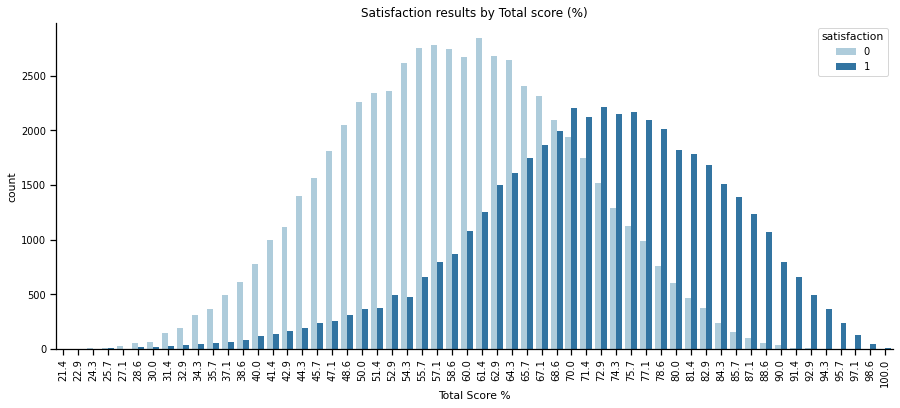

In [ ]:
# create graph
plt.figure(figsize = (15, 6))
sns.countplot(x ="Total Score %", data = df, hue ="satisfaction", palette ="Paired" )

# format graph
plt.title("Satisfaction results by Total score (%)", fontsize = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

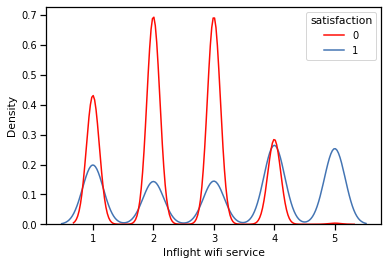

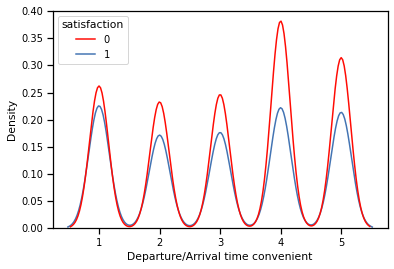

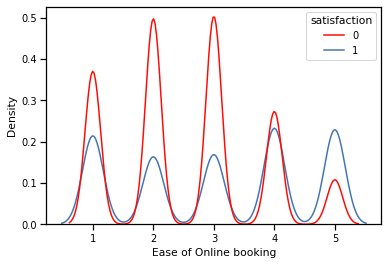

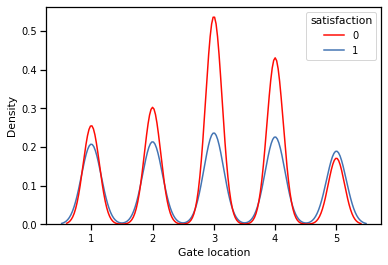

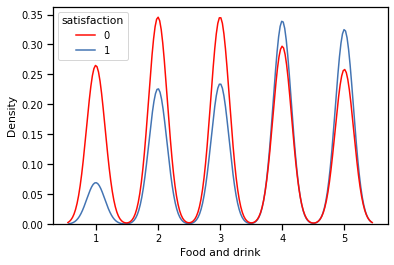

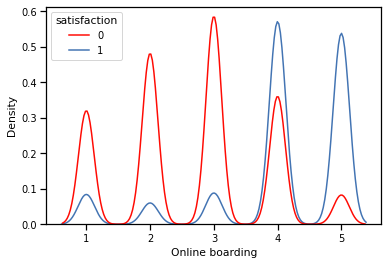

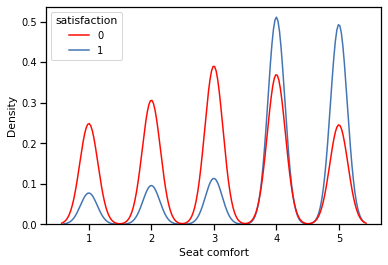

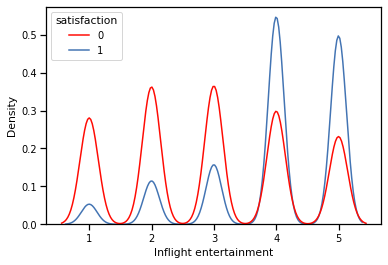

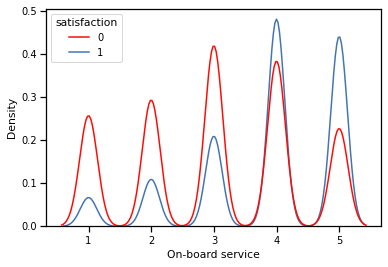

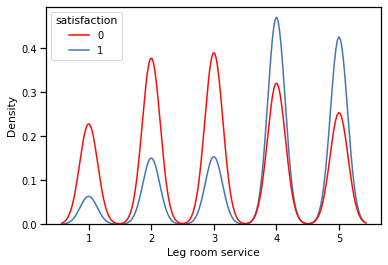

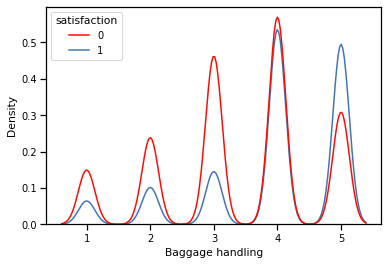

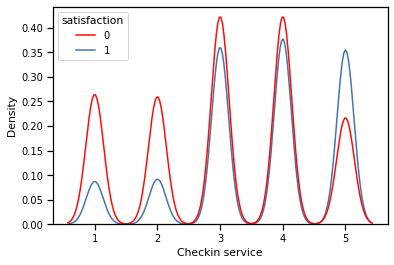

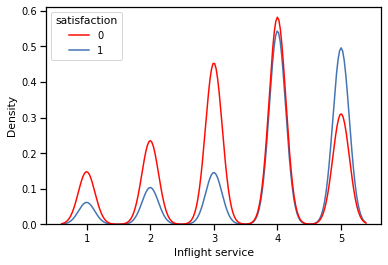

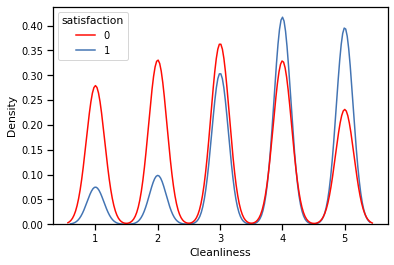

In [ ]:
numericas = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
          
for num in numericas:
    sns.kdeplot(x = num, hue = 'satisfaction', data = df)
    plt.show()

## Modelo

**Particion**

In [ ]:
from sklearn.model_selection import train_test_split

columnas = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 
            'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
            'Total Score %', 'Arrival Delay in Minutes', 'Loyal Customer', 'disloyal Customer', 'Business travel', 'Personal Travel', 'Class-encoded']

X = df[columnas]
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

75% train y 25% test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77928, 25)
(25976, 25)
(77928,)
(25976,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import (accuracy_score, roc_auc_score, average_precision_score, classification_report, roc_curve, auc, confusion_matrix, 
                             plot_confusion_matrix, precision_recall_fscore_support, f1_score,precision_score,recall_score, plot_roc_curve, ConfusionMatrixDisplay)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install lightgbm
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

#Creación de Modelos
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xg = XGBClassifier()
cb = CatBoostClassifier()
lgbm = LGBMClassifier()

models = [dt, rf, et, knn, ada, xg, cb, lgbm]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print("\tExplained variance:", explained_variance_score(y_test, y_pred))
  print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
  print("\tR2 score:", r2_score(y_test, y_pred))
  print()

DecisionTreeClassifier()
	Explained variance: 0.6907347019655878
	Mean absolute error: 0.07591623036649214
	R2 score: 0.6906743158914499

RandomForestClassifier()
	Explained variance: 0.8118824093524261
	Mean absolute error: 0.04669695103172159
	R2 score: 0.8097301953226819

ExtraTreesClassifier()
	Explained variance: 0.8029163333732787
	Mean absolute error: 0.04892978133661842
	R2 score: 0.8006323810841951

KNeighborsClassifier()
	Explained variance: 0.10106566022404617
	Mean absolute error: 0.2217816445950108
	R2 score: 0.09633607193237459

AdaBoostClassifier()
	Explained variance: 0.6395084283712013
	Mean absolute error: 0.08850477363720358
	R2 score: 0.6393814666503261

XGBClassifier()
	Explained variance: 0.7167828932532119
	Mean absolute error: 0.0700261780104712
	R2 score: 0.7146737224171132

Learning rate set to 0.066174
0:	learn: 0.6096602	total: 73.7ms	remaining: 1m 13s
1:	learn: 0.5504843	total: 101ms	remaining: 50.6s
2:	learn: 0.5004142	total: 125ms	remaining: 41.5s
3:	lear

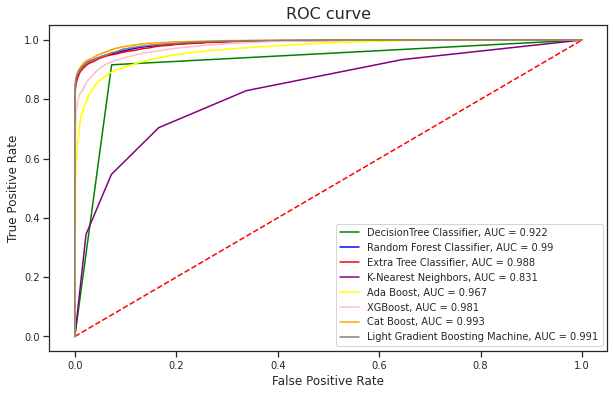

In [ ]:
#ROC AUC
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1],'r--')

# DecisionTree Classifier
predict_dt = dt.predict_proba(X_test)
probs_dt = predict_dt[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_dt)
aucdt = roc_auc_score(y_test, probs_dt)
plt.plot(fpr, tpr, color='green', label=f'DecisionTree Classifier, AUC = {str(round(aucdt,3))}')

# Random Forest Classifier
predict_rf = rf.predict_proba(X_test)
probs_rf = predict_rf[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_rf)
aucrf = roc_auc_score(y_test, probs_rf)
plt.plot(fpr, tpr, color='blue', label=f'Random Forest Classifier, AUC = {str(round(aucrf,3))}')

# Extra Tree Classifier
predict_et = et.predict_proba(X_test)
probs_et = predict_et[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_et)
aucet = roc_auc_score(y_test, probs_et)
plt.plot(fpr, tpr, color='red', label=f'Extra Tree Classifier, AUC = {str(round(aucet,3))}')

# KNN
predict_knn = knn.predict_proba(X_test)
probs_knn = predict_knn[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_knn)
aucknn = roc_auc_score(y_test, probs_knn)
plt.plot(fpr, tpr, color='purple', label=f'K-Nearest Neighbors, AUC = {str(round(aucknn,3))}')

# Ada Boost
predict_ada = ada.predict_proba(X_test)
probs_ada = predict_ada[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_ada)
aucada = roc_auc_score(y_test, probs_ada)
plt.plot(fpr, tpr, color='yellow', label=f'Ada Boost, AUC = {str(round(aucada,3))}')

# XGBoost
predict_xgb = xg.predict_proba(X_test)
probs_xgb = predict_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_xgb)
aucxgb = roc_auc_score(y_test, probs_xgb)
plt.plot(fpr, tpr, color='pink', label=f'XGBoost, AUC = {str(round(aucxgb,3))}')

# Cat Boost
predict_cb = cb.predict_proba(X_test)
probs_cb = predict_cb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_cb)
auccb = roc_auc_score(y_test, probs_cb)
plt.plot(fpr, tpr, color='orange', label=f'Cat Boost, AUC = {str(round(auccb,3))}')

# LGBM
predict_lgbm = lgbm.predict_proba(X_test)
probs_lgbm = predict_lgbm[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probs_lgbm)
auclgbm = roc_auc_score(y_test, probs_lgbm)
plt.plot(fpr, tpr, color='gray', label=f'Light Gradient Boosting Machine, AUC = {str(round(auclgbm,3))}')


plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

**Resultados**

DecisionTreeClassifier()

	R2 score: 0.6903605981590883

RandomForestClassifier()

	R2 score: 0.8092596187241394

ExtraTreesClassifier()

	R2 score: 0.7993775101547487

BaggingClassifier()

	R2 score: 0.7782015632203398

KNeighborsClassifier()

	R2 score: 0.09633607193237459


AdaBoostClassifier()

	R2 score: 0.6393814666503261

XGBClassifier()

	R2 score: 0.7146737224171132

CatBoostClassifier()

	R2 score: 0.8229063400818697


LGBMClassifier()

	R2 score: 0.8098870541888628


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Arboles de Decisión

Text(0.5, 0, 'max depth')

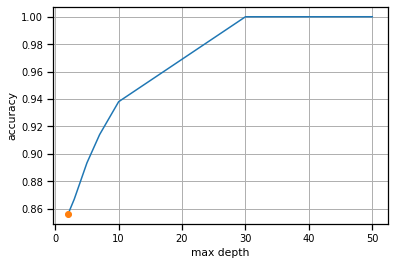

In [ ]:
# optimizando max_depth
lista = [2, 3, 5, 7, 10, 30, 50]
accuracy = []

for x in lista:
    dtc = DecisionTreeClassifier(max_depth = x) 
    dtc.fit(X_train, y_train)
    accuracy.append(dtc.score(X_train, y_train))

plt.plot(lista, accuracy) 
plt.plot(lista[0], accuracy[0], marker='o') 
plt.grid()
plt.ylabel('accuracy') 
plt.xlabel('max depth')

In [ ]:
# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [2, 4, 8, 10, 12]

# Cantidad minima de smaples requeridos para las hojas
min_samples_leaf = [2, 3, 5, 7, 8, 10, 12]

# cantidad maxima de samples requeridos por nodo hoja
max_features = [3, 5, 8, 10, 15, 20]

# Creo grid
param_grid = {'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
dt = DecisionTreeClassifier(max_depth = 30)

# Instanciar grid search
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)

In [ ]:
# Fit grid search
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 20, 'min_samples_leaf': 12, 'min_samples_split': 4}

In [ ]:
# {'max_features': 20, 'min_samples_leaf': 12, 'min_samples_split': 4}
arbol = DecisionTreeClassifier(max_depth = 30, max_features = 20, min_samples_leaf = 12, min_samples_split = 4)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, max_features=20, min_samples_leaf=12,
                       min_samples_split=4)

In [ ]:
arbol.score(X_train,y_train)

0.954663278924135

In [ ]:
# Score de testeo
arbol.score(X_test,y_test)

0.9382891900215584

In [ ]:
model = arbol
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14143   602]
 [ 1037 10194]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14745
           1       0.94      0.91      0.93     11231

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



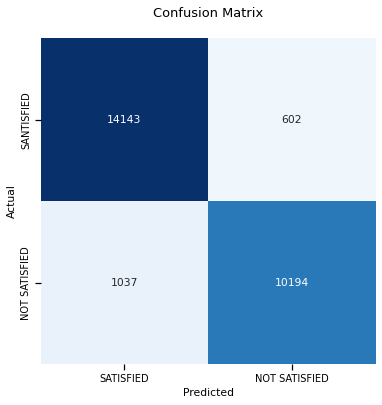

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.yticks(np.arange(2) + 0.5, ["SANTISFIED", "NOT SATISFIED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9348630001510558

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


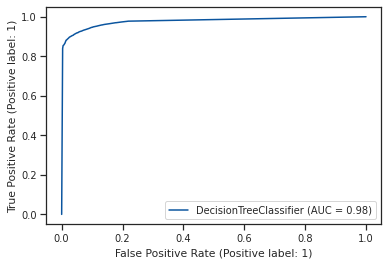

In [ ]:
plot_roc_curve(arbol, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
accuracy_score(y_test, y_pred)

0.9382891900215584

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9382891900215584
Precision:  0.9456582114423255
Recall:  0.9095361054224913
F1:  0.9272454953932737


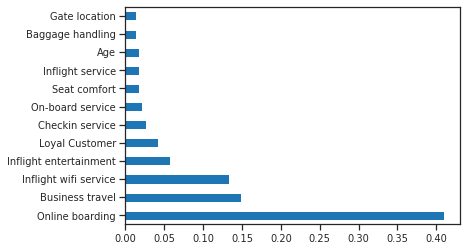

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(arbol.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4')

### Random Forest

Text(0.5, 0, 'n_estimators')

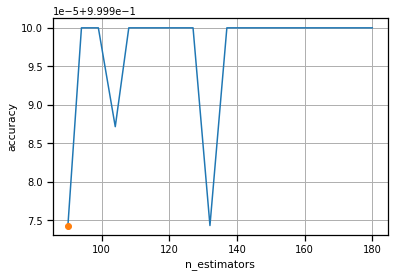

In [ ]:
# optimizando n_estimators
lista = [int(x) for x in np.linspace(start = 90, stop = 180, num = 20)]
accuracy = []

for x in lista:
    rf = RandomForestClassifier(bootstrap = True, n_estimators = x) 
    rf.fit(X_train, y_train)
    accuracy.append(rf.score(X_train, y_train))

plt.plot(lista, accuracy) 
plt.plot(lista[0], accuracy[0], marker='o') 
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('n_estimators')

In [ ]:
# Maxima cantidad de profundidad de los arboles
max_depth = [int(x) for x in np.linspace(40, 55, num = 5)]

# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [8, 10, 12]

# Cantidad minima de smaples requeridos para las hojas
min_samples_leaf = [3, 5, 10]

# cantidad maxima de samples requeridos por nodo hoja
max_features = [2, 3, 5]

# Creo grid
param_grid = {'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
rf = RandomForestClassifier(bootstrap = True, n_estimators = 120)

# Instanciar grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)

In [ ]:
# Fit grid search
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 40,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [ ]:
# 'bootstrap': True, 'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8
rf = RandomForestClassifier(bootstrap = True, max_depth = 40, max_features = 5, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 120)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

0.9740786366902782

In [ ]:
rf.score(X_test, y_test)

0.9516091777024946

In [ ]:
model = rf
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14416   329]
 [  913 10318]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14745
           1       0.97      0.92      0.94     11231

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



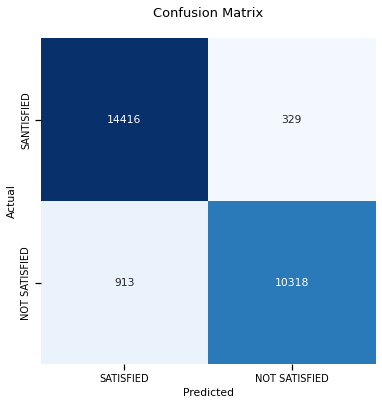

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.yticks(np.arange(2) + 0.5, ["SANTISFIED", "NOT SATISFIED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9481972507488553

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


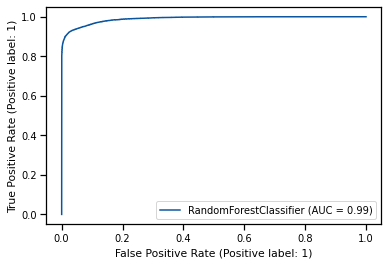

In [ ]:
plot_roc_curve(model, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9516091777024946
Precision:  0.9673851921274602
Recall:  0.919063306918351
F1:  0.9426053604858226


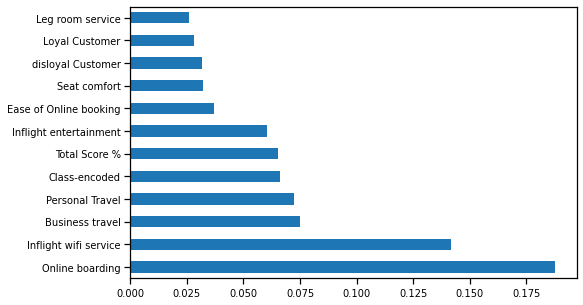

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(rf.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4', figsize = (8, 5))

### Extra Trees

In [ ]:
et = ExtraTreesClassifier(bootstrap=True)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True)

In [ ]:
print("bootstrap = True :")
print("\nScore Entrenamiento:", et.score(X_train,y_train))
print("Score Testeo:", et.score(X_test,y_test))

bootstrap = True :

Score Entrenamiento: 1.0
Score Testeo: 0.9503387742531567


In [ ]:
et = ExtraTreesClassifier(bootstrap=False)
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
print("bootstrap = False :")
print("\nScore Entrenamiento:", et.score(X_train,y_train))
print("Score Testeo:", et.score(X_test,y_test))

bootstrap = False :

Score Entrenamiento: 1.0
Score Testeo: 0.9506082537727133


BOOTSTRAP = FALSE obtiene un mejor R2

In [ ]:
et = ExtraTreesClassifier(bootstrap = False)

Con el fin de mejorar el modelo, se procederá a evaluar las variaciones en los 'scores' del parámetro max_depth

In [ ]:
fila = []

for i in range(18, 31, 2):
  extratree = ExtraTreesClassifier(bootstrap = False, max_depth = i)
  extratree.fit(X_train,y_train)
  train = extratree.score(X_train, y_train)
  test = extratree.score(X_test, y_test)
  fila.append([i, train, test])

In [ ]:
scores = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores

,max_depth,r2_train,r2_test
0,18,0.985320,0.948337
1,20,0.993930,0.950724
2,22,0.998730,0.950801
3,24,0.999782,0.949838
4,26,0.999974,0.950185
5,28,0.999987,0.951147
6,30,1.000000,0.949723


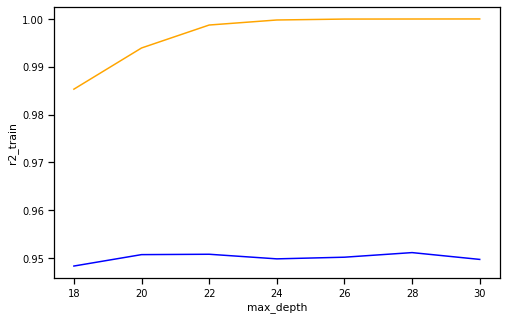

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(data=scores, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores, x="max_depth", y="r2_test", color = 'blue')

Text(0.5, 0, 'min_samples_split')

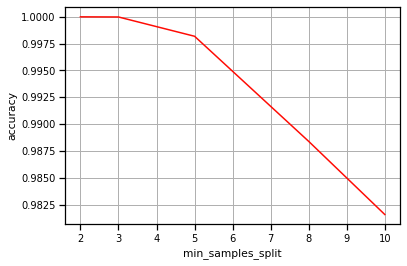

In [ ]:
# optimizando min_samples_split
lista = [2, 3, 5, 8, 10]
accuracy = []

for x in lista:
    et = ExtraTreesClassifier(bootstrap = False, max_depth = 28, min_samples_split = x)
    et.fit(X_train, y_train)
    accuracy.append(et.score(X_train, y_train))

plt.plot(lista, accuracy) 
plt.grid()
plt.ylabel('accuracy') 
plt.xlabel('min_samples_split')

In [ ]:
parametros = {'n_estimators': [200, 300, 400],
              'max_depth': [28],
              'min_samples_split': [3],
              'max_features':[3, 5, 8, 10]}

modelo = ExtraTreesClassifier(bootstrap = False)
grid = GridSearchCV(modelo, parametros)

In [ ]:
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 28,
 'max_features': 10,
 'min_samples_split': 3,
 'n_estimators': 400}

In [ ]:
extra = ExtraTreesClassifier(bootstrap = False, max_depth= 28, max_features = 10, min_samples_split = 3, n_estimators = 400) 
extra.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=28, max_features=10, min_samples_split=3,
                     n_estimators=400)

In [ ]:
extra.score(X_train, y_train)

0.9999871676419259

In [ ]:
extra.score(X_test,y_test)

0.9539574992300586

In [ ]:
model = extra
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14448   297]
 [  880 10351]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14745
           1       0.97      0.92      0.95     11231

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.95      0.95     25976



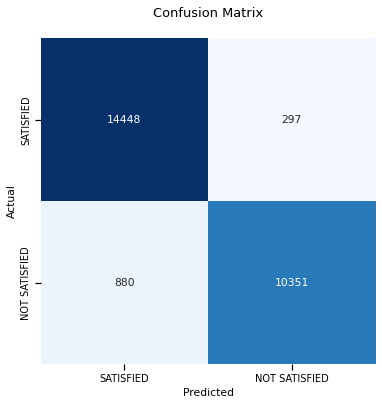

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.yticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9501708850415511

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


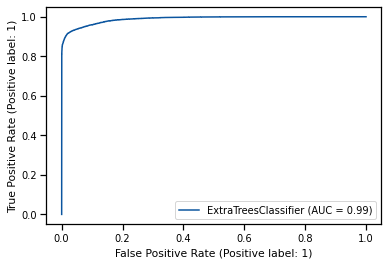

In [ ]:
plot_roc_curve(model, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9539574992300586
Precision:  0.9698473639853918
Recall:  0.9221796812394266
F1:  0.9454130534002738


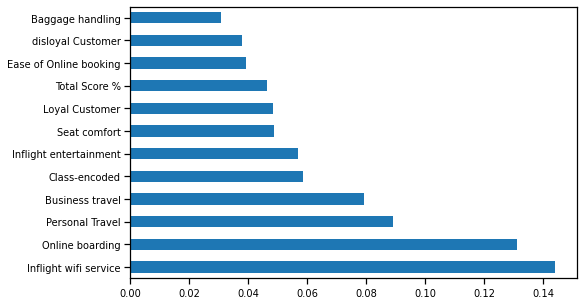

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(extra.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4', figsize = (8, 5))

### KNN

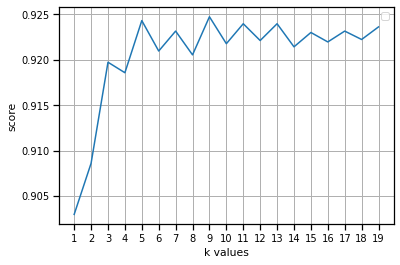

In [ ]:
lista = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(X_train, y_train)
    lista.append(knn2.score(X_test, y_test))

plt.plot(range(1,20), lista)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# n_neighbors: 9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.score(X_train, y_train)

0.9341571707216918

In [ ]:
knn.score(X_test, y_test)

0.9247382198952879

Text(0.5, 0, 'weights')

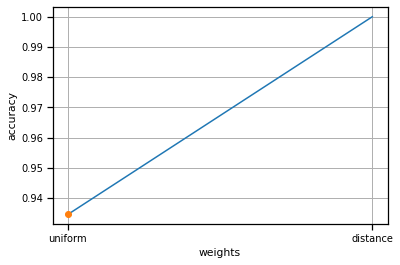

In [ ]:
# optimizando weights
lista = ['uniform', 'distance']
accuracy = []

for x in lista:
    knn = KNeighborsClassifier(n_neighbors = 9, weights = x) 
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_train, y_train))

plt.plot(lista, accuracy) 
plt.plot(lista[0], accuracy[0], marker='o') 
plt.grid()
plt.ylabel('accuracy') 
plt.xlabel('weights')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9, weights='distance')

In [ ]:
knn.score(X_train, y_train)

1.0

In [ ]:
knn.score(X_test, y_test)

0.924853711117955

In [ ]:
model = knn
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14241   504]
 [ 1449  9782]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14745
           1       0.95      0.87      0.91     11231

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.92      0.92     25976



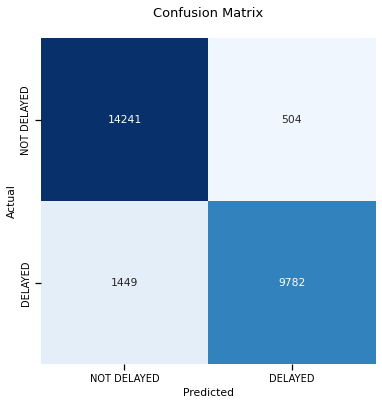

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9184005123879162

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


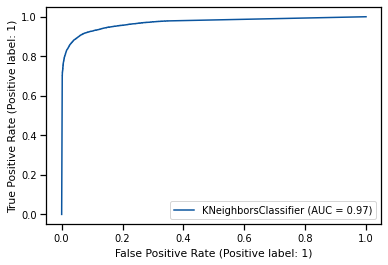

In [ ]:
plot_roc_curve(model, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

### AdaBoost

Parametros importantes del modelo
- n_estimators: el maximom numero de estimadores para entrenar secuencialmente.
- learning_rate: Esto determina el peso aplicado a cada estimador en el proceso de impulso. El valor predeterminado es 1. Los valores más pequeños, como 0.05, 0.1, obligan al algoritmo a entrenar más lento pero con puntajes de alto rendimiento.

Medir el efecto de learning_rate

Text(0, 0.5, 'accuracy')

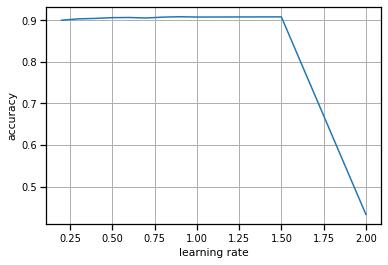

In [ ]:
# optimizando learning_rate
lista = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2.0]
accuracy = []

for x in lista:
    ada = AdaBoostClassifier(learning_rate = x) 
    ada.fit(X_train, y_train)
    accuracy.append(ada.score(X_train, y_train))

plt.plot(lista, accuracy)
plt.grid()
plt.xlabel("learning rate")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

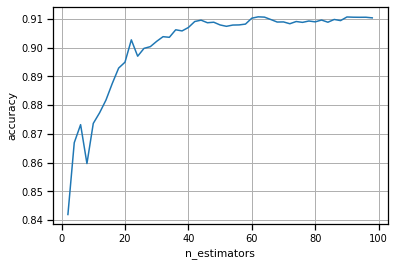

In [ ]:
# optimizando n_estimators
lista = list(range(2, 100, 2))
accuracy = []

for x in lista:
    ada = AdaBoostClassifier(learning_rate = 1.5, n_estimators = x) 
    ada.fit(X_train, y_train)
    accuracy.append(ada.score(X_train, y_train))

plt.plot(lista, accuracy)
plt.grid()
plt.xlabel("n_estimators")
plt.ylabel("accuracy")

In [ ]:
ada = AdaBoostClassifier(learning_rate = 1.5, n_estimators = 100, random_state = 42)

In [ ]:
ada.fit(X_train, y_train)
ada.score(X_train,y_train)

0.9121111795503541

In [ ]:
ada.score(X_test, y_test)

0.9141515244841392

In [ ]:
model = ada
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13699  1046]
 [ 1184 10047]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     14745
           1       0.91      0.89      0.90     11231

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



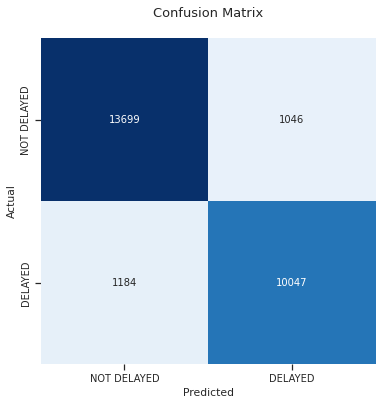

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9118191036116036

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


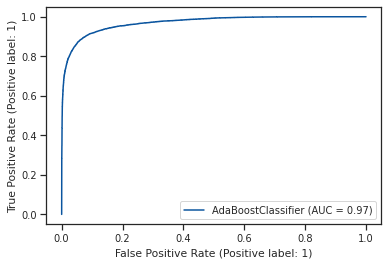

In [ ]:
plot_roc_curve(ada, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9141515244841392
Precision:  0.9057063012710719
Recall:  0.8945775086813285
F1:  0.9001075076151228


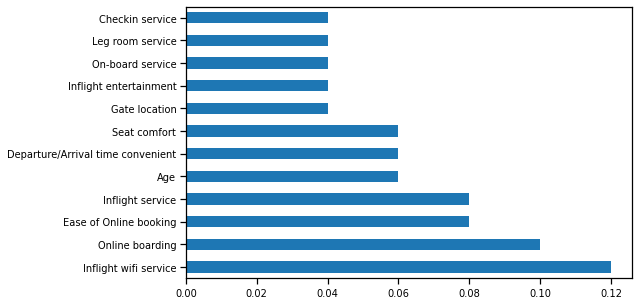

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(ada.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4', figsize = (8, 5))

### Light Gradient Boosting Machine

Text(0, 0.5, 'accuracy')

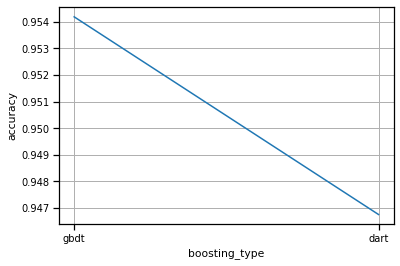

In [ ]:
# optimizando boosting_type
lista = ['gbdt','dart']
accuracy = []

for x in lista:
    lgbm = LGBMClassifier(boosting_type = x) 
    lgbm.fit(X_train, y_train)
    accuracy.append(lgbm.score(X_train, y_train))

plt.plot(lista, accuracy)
plt.grid()
plt.xlabel("boosting_type")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

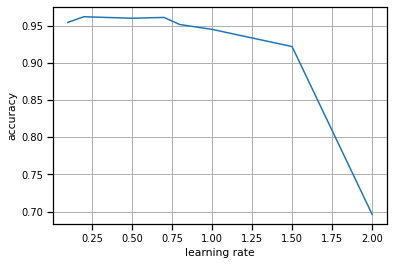

In [ ]:
# optimizando learning_rate
lista = [0.1, 0.2, 0.5, 0.7, 0.8, 1, 1.5, 2.0]
accuracy = []

for x in lista:
    lgbmc = LGBMClassifier(boosting_type = 'gbdt', learning_rate = x) 
    lgbmc.fit(X_train, y_train)
    accuracy.append(lgbmc.score(X_train, y_train))

plt.plot(lista, accuracy, color = '#1e77b4')
plt.grid()
plt.xlabel("learning rate")
plt.ylabel("accuracy")

In [ ]:
parameters = {
    'max_depth' : range(1, 20, 2),
    'objective' : ['binary'],
    'n_estimators': range(100, 350, 25),
    'num_leaves': range(20, 30, 2)
    }

modelo = LGBMClassifier(boosting_type = 'gbdt', learning_rate = 0.2)
gridsearch = GridSearchCV(estimator = modelo, param_grid = parameters, scoring='accuracy', cv = 3)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'max_depth': 15, 'n_estimators': 325, 'num_leaves': 24, 'objective': 'binary'}

In [ ]:
# {'max_depth': 15, 'n_estimators': 325, 'num_leaves': 24, 'objective': 'binary'}
lgbm = LGBMClassifier(boosting_type='gbdt', max_depth = 15, learning_rate = 0.2, n_estimators = 325, num_leaves = 24, objective = 'binary')
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=15, n_estimators=325, num_leaves=24,
               objective='binary')

In [ ]:
lgbm.score(X_train, y_train)

0.9794040652910379

In [ ]:
lgbm.score(X_test, y_test)

0.9557668617185094

In [ ]:
model = lgbm
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14403   342]
 [  851 10380]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14745
           1       0.97      0.92      0.95     11231

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



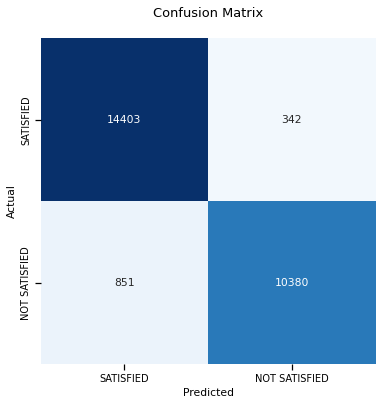

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.yticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9523906257987003

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


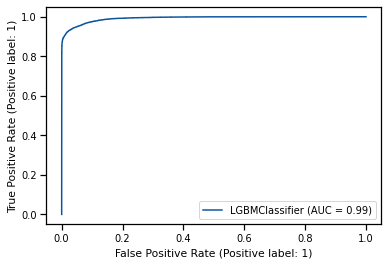

In [ ]:
plot_roc_curve(model, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9557668617185094
Precision:  0.9689302325581395
Recall:  0.9274329979520969
F1:  0.9477275829125154


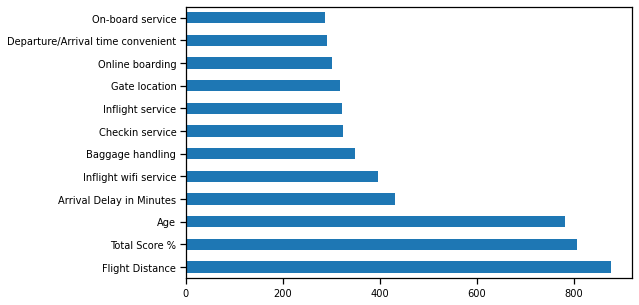

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(lgbm.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4', figsize = (8, 5))

### Catboost

In [ ]:
fila = []
lista = [0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2.0]

for i in lista :
  cb = CatBoostClassifier(learning_rate = i)
  cb.fit(X_train,y_train)
  train = cb.score(X_train, y_train)
  test = cb.score(X_test, y_test)
  fila.append([i, train, test])

scores = pd.DataFrame(fila, columns=["learning_rate", "r2_train", "r2_test"])

In [ ]:
scores

,learning_rate,r2_train,r2_test
0,0.05,0.963980,0.955767
1,0.10,0.975939,0.956190
2,0.20,0.988977,0.955805
3,0.50,0.999448,0.954496
4,0.80,0.999859,0.950839
5,1.00,0.999949,0.950801
6,1.50,0.999872,0.942947
7,2.00,0.921171,0.918271


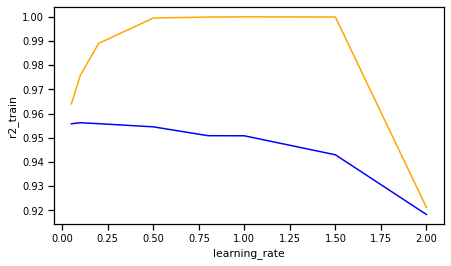

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.lineplot(data = scores, x = 'learning_rate', y = 'r2_train', color = 'orange')
ax = sns.lineplot(data = scores, x = 'learning_rate', y = 'r2_test', color = 'blue')

Se han truncado las últimas 5000 líneas del flujo de salida.
0:	learn: 0.5064011	total: 20.9ms	remaining: 20.9s
1:	learn: 0.3964886	total: 41.3ms	remaining: 20.6s
2:	learn: 0.3426381	total: 61.3ms	remaining: 20.4s
3:	learn: 0.3053056	total: 83.6ms	remaining: 20.8s
4:	learn: 0.2793500	total: 113ms	remaining: 22.4s
5:	learn: 0.2655630	total: 132ms	remaining: 21.9s
6:	learn: 0.2424388	total: 157ms	remaining: 22.3s
7:	learn: 0.2294549	total: 182ms	remaining: 22.6s
8:	learn: 0.2230536	total: 201ms	remaining: 22.1s
9:	learn: 0.2184872	total: 220ms	remaining: 21.8s
10:	learn: 0.2135453	total: 245ms	remaining: 22s
11:	learn: 0.2105117	total: 264ms	remaining: 21.8s
12:	learn: 0.2043691	total: 284ms	remaining: 21.6s
13:	learn: 0.2004138	total: 304ms	remaining: 21.4s
14:	learn: 0.1957216	total: 324ms	remaining: 21.3s
15:	learn: 0.1940660	total: 356ms	remaining: 21.9s
16:	learn: 0.1898941	total: 375ms	remaining: 21.7s
17:	learn: 0.1865237	total: 396ms	remaining: 21.6s
18:	learn: 0.1839073	total: 4

Text(0, 0.5, 'accuracy')

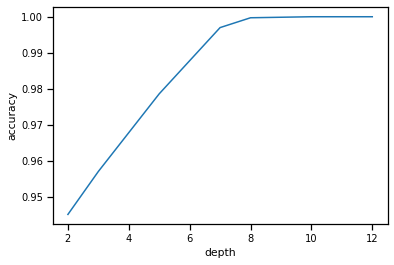

In [ ]:
# optimizando depth
lista = [2, 3, 5, 7, 8, 10, 12]
accuracy = []

for x in lista:
    cb = CatBoostClassifier(learning_rate = 0.2, depth = x) 
    cb.fit(X_train, y_train)
    accuracy.append(cb.score(X_train, y_train))

plt.plot(lista, accuracy, color = '#1e77b4')
plt.xlabel("depth")
plt.ylabel("accuracy")

In [ ]:
parametros = {'iterations': [100, 150, 200, 300, 400, 500, 600],
                'depth': [8],
                'learning_rate': [0.2],
                'l2_leaf_reg': [1, 2, 3, 4, 5]}

modelo = CatBoostClassifier()
grid = GridSearchCV(estimator = modelo, param_grid = parametros, cv = 3, n_jobs = -1)
grid.fit(X_train, y_train)

0:	learn: 0.4528269	total: 77.9ms	remaining: 23.3s
1:	learn: 0.3351489	total: 107ms	remaining: 15.9s
2:	learn: 0.2712529	total: 136ms	remaining: 13.4s
3:	learn: 0.2375382	total: 163ms	remaining: 12.1s
4:	learn: 0.2040016	total: 191ms	remaining: 11.2s
5:	learn: 0.1923120	total: 220ms	remaining: 10.8s
6:	learn: 0.1810599	total: 249ms	remaining: 10.4s
7:	learn: 0.1761300	total: 277ms	remaining: 10.1s
8:	learn: 0.1695835	total: 310ms	remaining: 10s
9:	learn: 0.1645571	total: 340ms	remaining: 9.85s
10:	learn: 0.1603826	total: 367ms	remaining: 9.65s
11:	learn: 0.1576620	total: 394ms	remaining: 9.47s
12:	learn: 0.1539701	total: 422ms	remaining: 9.31s
13:	learn: 0.1516304	total: 451ms	remaining: 9.22s
14:	learn: 0.1482489	total: 489ms	remaining: 9.29s
15:	learn: 0.1468882	total: 519ms	remaining: 9.21s
16:	learn: 0.1454741	total: 547ms	remaining: 9.11s
17:	learn: 0.1433924	total: 575ms	remaining: 9s
18:	learn: 0.1423499	total: 602ms	remaining: 8.9s
19:	learn: 0.1404280	total: 629ms	remaining: 8

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fb232976790>,
             n_jobs=-1,
             param_grid={'depth': [8],
                         'iterations': [100, 150, 200, 300, 400, 500, 600],
                         'l2_leaf_reg': [1, 2, 3, 4, 5],
                         'learning_rate': [0.2]})

In [ ]:
grid.best_params_

{'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.2}

In [ ]:
# {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
catboost = CatBoostClassifier(depth = 8, iterations = 500, learning_rate = 0.2, l2_leaf_reg = 5)
catboost.fit(X_train, y_train)

0:	learn: 0.4516534	total: 34ms	remaining: 17s
1:	learn: 0.3392000	total: 67.2ms	remaining: 16.7s
2:	learn: 0.2706112	total: 98.8ms	remaining: 16.4s
3:	learn: 0.2339664	total: 129ms	remaining: 15.9s
4:	learn: 0.2144086	total: 158ms	remaining: 15.7s
5:	learn: 0.2014675	total: 187ms	remaining: 15.4s
6:	learn: 0.1889473	total: 216ms	remaining: 15.2s
7:	learn: 0.1826760	total: 249ms	remaining: 15.3s
8:	learn: 0.1752437	total: 281ms	remaining: 15.3s
9:	learn: 0.1697862	total: 311ms	remaining: 15.2s
10:	learn: 0.1671144	total: 337ms	remaining: 15s
11:	learn: 0.1642402	total: 367ms	remaining: 14.9s
12:	learn: 0.1582989	total: 396ms	remaining: 14.8s
13:	learn: 0.1566140	total: 449ms	remaining: 15.6s
14:	learn: 0.1546190	total: 505ms	remaining: 16.3s
15:	learn: 0.1521598	total: 533ms	remaining: 16.1s
16:	learn: 0.1490930	total: 563ms	remaining: 16s
17:	learn: 0.1473431	total: 592ms	remaining: 15.9s
18:	learn: 0.1455042	total: 622ms	remaining: 15.7s
19:	learn: 0.1446367	total: 649ms	remaining: 1

In [ ]:
catboost.score(X_train, y_train)

0.9943280977312391

In [ ]:
catboost.score(X_test, y_test)

0.9632737911918694

In [ ]:
model = catboost
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14363   382]
 [  788 10443]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14745
           1       0.96      0.93      0.95     11231

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.95      0.95     25976



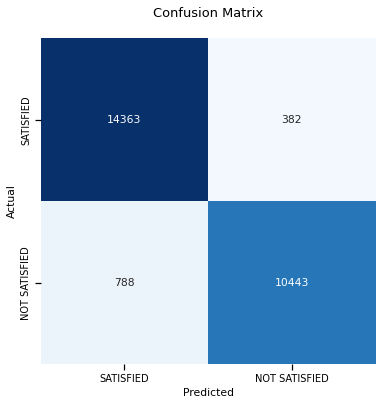

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.yticks(np.arange(2) + 0.5, ["SATISFIED", "NOT SATISFIED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix\n", size = 13)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.9612417115961703

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


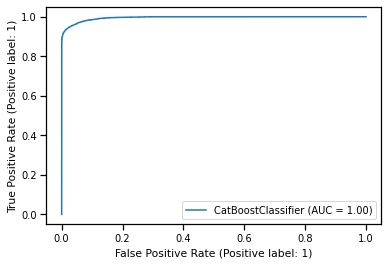

In [ ]:
plot_roc_curve(model, X_test, y_test, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None)[1])
print('Recall: ', recall_score(y_test, y_pred, average=None)[1])
print('F1: ', f1_score(y_test, y_pred, average=None)[1])

Accuracy:  0.9632737911918694
Precision:  0.9681151498587957
Recall:  0.9462202831448668
F1:  0.9570425072046108


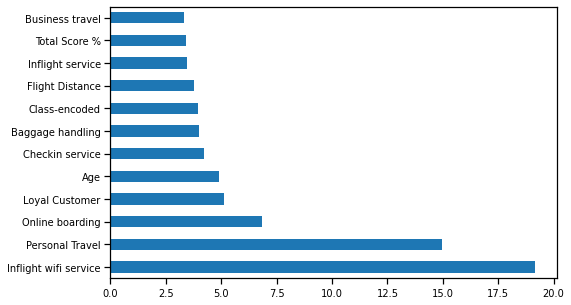

In [ ]:
# Plot feature importance
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index = columnas)
feature_importances.nlargest(12).plot(kind='barh', color = '#1e77b4', figsize = (8, 5))

Cross-Validation:

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(catboost, X, y, cv = k_folds)

0:	learn: 0.3921907	total: 33.2ms	remaining: 16.6s
1:	learn: 0.2874623	total: 64.6ms	remaining: 16.1s
2:	learn: 0.2306823	total: 95.6ms	remaining: 15.8s
3:	learn: 0.1995294	total: 144ms	remaining: 17.8s
4:	learn: 0.1799122	total: 174ms	remaining: 17.2s
5:	learn: 0.1577618	total: 204ms	remaining: 16.8s
6:	learn: 0.1502115	total: 240ms	remaining: 16.9s
7:	learn: 0.1446465	total: 270ms	remaining: 16.6s
8:	learn: 0.1375224	total: 301ms	remaining: 16.4s
9:	learn: 0.1333971	total: 331ms	remaining: 16.2s
10:	learn: 0.1299317	total: 361ms	remaining: 16.1s
11:	learn: 0.1264814	total: 392ms	remaining: 15.9s
12:	learn: 0.1243705	total: 427ms	remaining: 16s
13:	learn: 0.1198214	total: 463ms	remaining: 16.1s
14:	learn: 0.1174744	total: 492ms	remaining: 15.9s
15:	learn: 0.1160573	total: 527ms	remaining: 15.9s
16:	learn: 0.1148762	total: 556ms	remaining: 15.8s
17:	learn: 0.1134967	total: 585ms	remaining: 15.7s
18:	learn: 0.1116874	total: 615ms	remaining: 15.6s
19:	learn: 0.1103815	total: 644ms	remain

In [ ]:
print ("Cross Validation Scores: ", scores)
print ("Average CV Score: ", scores.mean())
print ("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96184014 0.96251383 0.96102209 0.96299504 0.96280077]
Average CV Score:  0.962234375638997
Number of CV Scores used in Average:  5


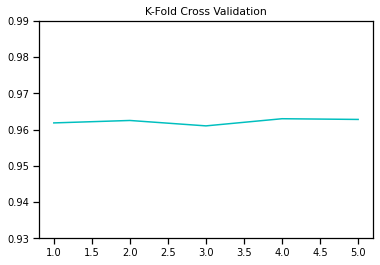

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.93, 0.99)
plt.show()